#### Import modules & prepare data

In [18]:
# Import sklearn/tensorflow modules.
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Import other modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from os import walk
from time import sleep
from IPython.display import clear_output
%matplotlib inline

_, _, files = next(walk('data'))

target_names = {
    '0': 'electron',    # Negatively charged particle that is a lepton  (doesn't take part in strong force).
    '1': 'muon',    # Electron with 200 times more mass and makes up lots of cosmic radiation.
    '2': 'pion',    # Meson (connects with strong force) that can be positive, negative, or neutral
    '3': 'kaon',    # Pion with more mass.
    '4': 'proton'    # Positively charged particle with 2 up quarks and 1 down quark.
}

# Check how the data is formatted/stored.
file_test = open(f'data/{files[0]}', 'rb')
file = pickle.load(file_test)

print(file[0].shape)    # Group of 3000 images.
print(file[0][0].shape)    # Check first image.
print(file[1].shape)    # Group of 3000 targets.
print(file[1][0])    #    Classified as 'pion.'

# Collect all the data.
data = []
target = []

for file in files:
    file = open(f'data/{files[0]}', 'rb')
    file =  pickle.load(file)

    for sample, sample_target in zip(file[0], file[1]):
        data.append(sample)
        target.append(sample_target)

data = np.array(data)
target = np.array(target)

print(data.shape)
print(target.shape)

data = data[::17]
target = target[::17]

sleep(7)
clear_output()

print('Editing target values...')
new_target = []

for tar in target:
    if tar == 11:
        new_target.append(0)
    elif tar == 13:
        new_target.append(1)
    elif tar == 211:
        new_target.append(2)
    elif tar == 321:
        new_target.append(3)
    else:
        new_target.append(4)
    
target = np.array(new_target)

print(np.unique(target))

X_train, X_test, y_train, y_test = train_test_split(data, target, stratify=target)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


Editing target values...
[0 1 2 3 4]
(55557, 10, 10)
(55557,)
(18520, 10, 10)
(18520,)


#### Data analysis

(55557, 10, 10)
(55557, 5)
(18520, 10, 10)
(18520, 5)


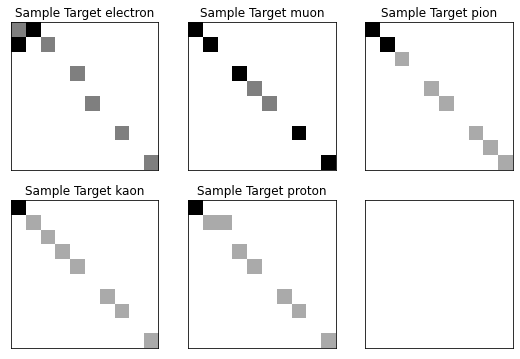

In [19]:
# Check for NaN values.
print(np.isnan(np.sum(data)))    # -> False

# Check range of values.
print(np.max(data), np.min(data))    # -> 8, 0

sleep(7)
clear_output()

# Get indexes for each different target possibility.
indexes = [
    np.where(target == 0)[0][0],
    np.where(target == 1)[0][0],
    np.where(target == 2)[0][0],
    np.where(target == 3)[0][0],
    np.where(target == 4)[0][0],
]

samples = [data[index] for index in indexes]
samples_target = [target_names[str(target[index])] for index in indexes]

fig, axs = plt.subplots(2, 3, figsize=(9, 6), subplot_kw={
    'yticks': (),
    'xticks': ()
})

axs = [ax for ax in axs.flatten()]

for sample, sample_target, ax in zip(samples, samples_target, axs):
    ax.imshow(sample, cmap='binary')
    ax.set_title(f'Sample Target {sample_target}')

# Change the train and test datasets.
scaler = MinMaxScaler()

# Reshape + change data 
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train = (scaler.fit_transform(X_train)).reshape((55557, 10, 10))
X_test = (scaler.transform(X_test)).reshape((18520, 10, 10))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


#### Create Model

In [22]:
def model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(10, 10)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = model()
model.fit(X_train, y_train)


ValueError: Input 0 of layer conv2d_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: [None, 10, 10]